In [32]:
import pandas as pd
import numpy as np

In [33]:
#Loading the dataset
train_df = pd.read_csv('./train_lpp.csv') 
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Binary Encoding of Categorical Variables

In [35]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 62.5+ KB


## Checking for Missing Values

In [37]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
## dropping all the missing values
train_df = train_df.dropna()
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Segregating the target variable from the features

In [39]:
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

((480, 5), (480,))

## Splitting the data

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

## Model Training

In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=5)

## Cross Validation

In [42]:
from sklearn.metrics import accuracy_score

pred_val = model.predict(X_val)
accuracy_score(y_val, pred_val)

0.7916666666666666

In [43]:
pred_train = model.predict(X_train)
accuracy_score(y_train, pred_train)

0.8385416666666666

## Saving the model

In [44]:
# saving the model 
import pickle 

pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

## Test Prediction for a Sample Data Point

In [45]:
loan_application = {
    'Gender': "Male",
    'Married': "Unmarried",
    'ApplicantIncome': 50000,
    'Credit_History': "Cleared Debts",
    'LoanAmount': 500000
}

In [46]:
model_pickle = open("./classifier.pkl", 'rb')
clf = pickle.load(model_pickle)

In [47]:
# defining the function which will make the prediction using the data which the user inputs 
# @app.route('/predict', method = ['POST'])


from flask import Flask, request, jsonify

def prediction(loan_req):
    # Pre-processing user input

#     loan_req = request.get_json()
    print(loan_req) 

    if loan_req['Gender'] == "Male":
        Gender = 0
    else:
        Gender = 1
 
    if loan_req['Married'] == "Unmarried":
        Married = 0
    else:
        Married = 1
 
    if loan_req['Credit_History'] == "Unclear Debts":
        Credit_History = 0
    else:
        Credit_History = 1  
 
    ApplicantIncome = loan_req['ApplicantIncome']
    LoanAmount = loan_req['LoanAmount'] / 1000
    
    # Making predictions 
    prediction = clf.predict( 
        [[Gender, Married, ApplicantIncome, LoanAmount, Credit_History]])
     
    if prediction == 0:
        pred = 'Rejected'
    else:
        pred = 'Approved'
    return pred


In [48]:
prediction(loan_application)

{'Gender': 'Male', 'Married': 'Unmarried', 'ApplicantIncome': 50000, 'Credit_History': 'Cleared Debts', 'LoanAmount': 500000}


c:\DATA SCIENCE\MLops\FlaskAPI\.venv\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Rejected'

When we Run our Flask app for 'GET' , this result we got in powershell
So now API is running on 'http://127.0.0.1:5000/'


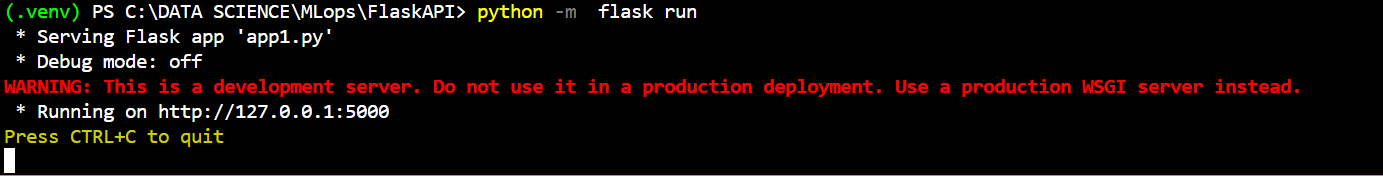

Now we checked this URL in Browser we got this

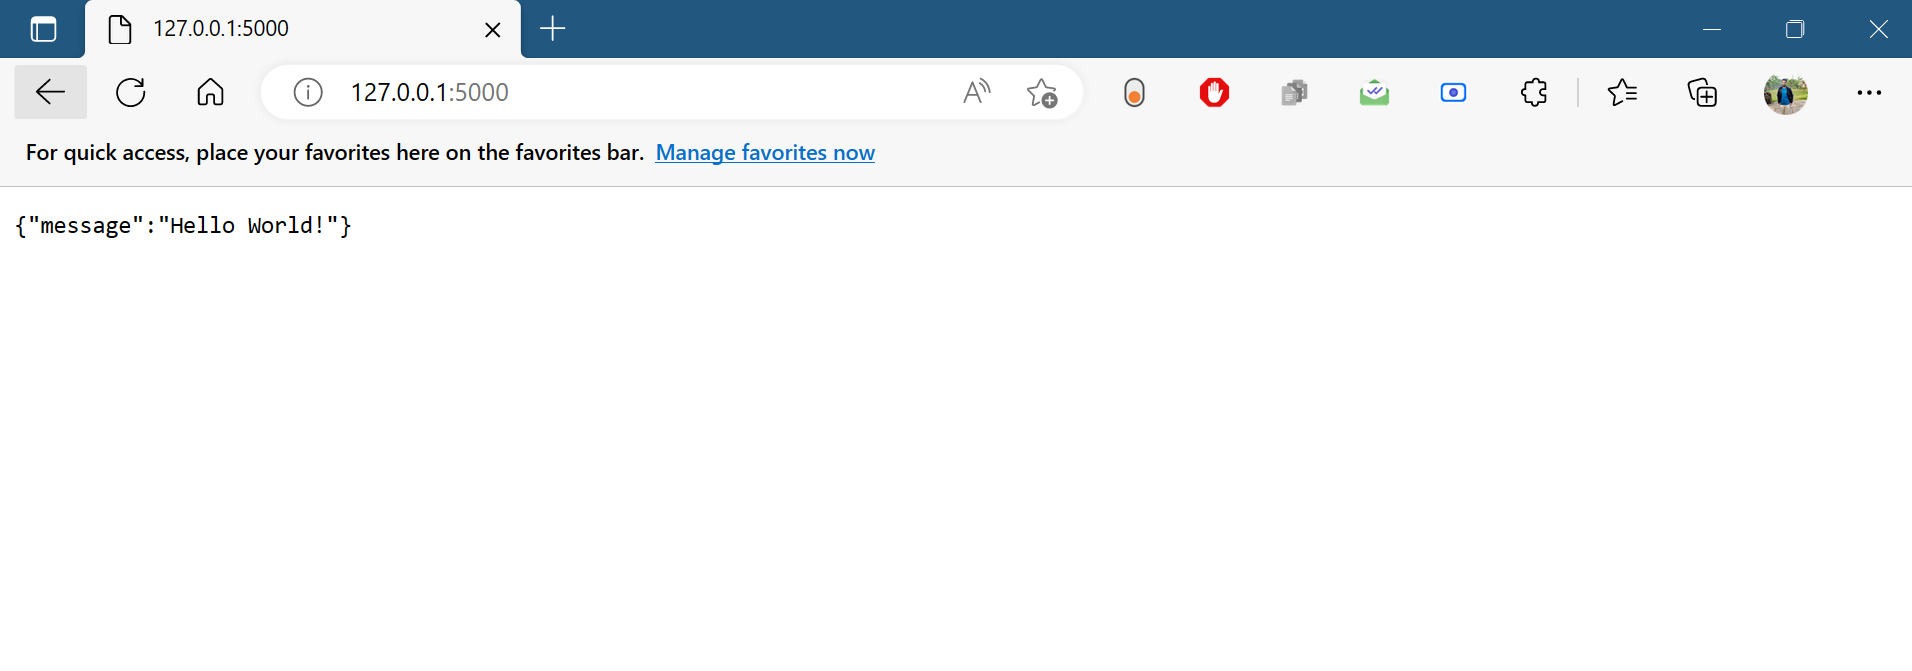

Everytime we are checking/Refreshing ,Entry is being shown in terminal with status code=200(means sucessfull)

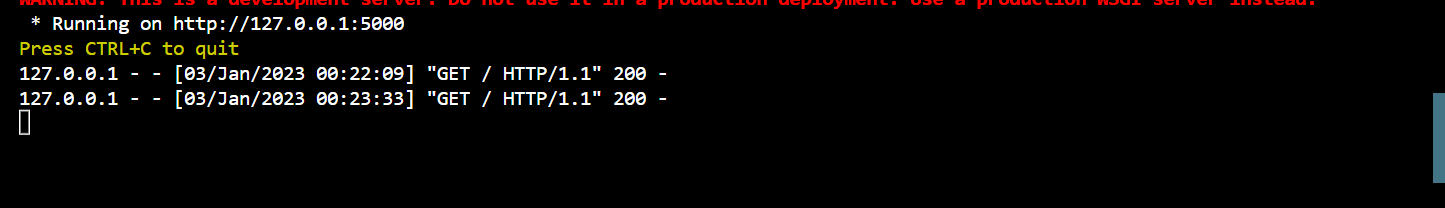

Now to check 'POST' method in our API we are using 'requests' library. with Postman it can also be done.

In [52]:
import requests
#Hitting the 'predict' route from base branch , giving whole data as json file.
r = requests.post("http://127.0.0.1:5000/predict", json=loan_application)


In [53]:
# Predicting the output
r.content

b'{"Loan_approval_status":"Rejected"}\n'

For 'POST' method also , entries in Terminal with http code =200(means sucessfull)


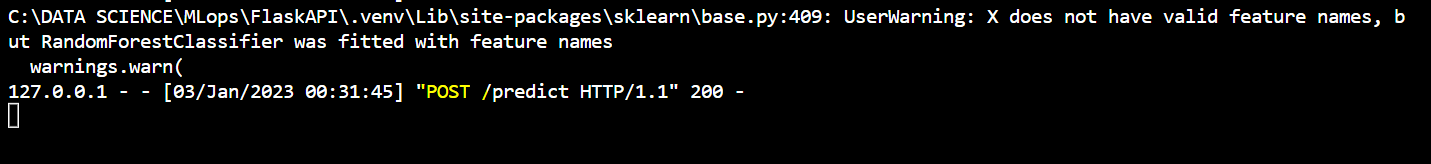